In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

# plt.style.use('dark_background')

filename='vehicles.csv'
df=pd.read_csv(filename,parse_dates=['posting_date'])


### Data Cleaning and Preprocessing

In [2]:

df=df.drop(columns=['county','state','lat','long'])
# filters
# df = df[df['posting_date'] > 2019]
df = df[df['year'] > 1999]
df = df[df['odometer'] < 150000]
df = df[(df['condition'] == 'excellent') | (df['condition'] == 'good')]
df = df[(df['transmission'] == 'manual') | (df['transmission'] == 'automatic')]

# Find the top 8 most frequent manufacturers
top_num=10
top_manufacturers = df['manufacturer'].value_counts().head(top_num).index.tolist()

# Filter the DataFrame to include only the rows where 'manufacturer' is in the top 8
df = df[df['manufacturer'].isin(top_manufacturers)]

# manufacturer_list=['subaru','bmw','toyota','ford','lexus','gmc']
# df = df[df['manufacturer'].isin(manufacturer_list)]
# Convert 'cylinders' column to numeric, removing ' cylinders' text
df['cylinders'] = pd.to_numeric(df['cylinders'].str.replace(' cylinders', ''), errors='coerce')

# If needed, fill NaN values with 0 (or any other number)
# df['cylinders'] = df['cylinders'].fillna(0).astype(int)
# drop rows where 'description' is missing
df=df.dropna(subset=['description'])
df = df.replace({np.nan: None})
df['year'] = df['year'].astype(int)

In [3]:
# df['cylinders'] = df['cylinders'].str.replace(' cylinders', '').astype(int)
# Create the pivot table
dfp = df.pivot_table(index='manufacturer', columns='cylinders', values='id', aggfunc='count')
# Dynamically set colors based on the number of unique transmission types
transmission_types = df['transmission'].unique()
# colors = plt.cm.get_cmap('tab10', len(transmission_types)).colors
colors=['red', 'purple', 'blue', 'orange','yellow','green','cyan']


C:\Users\Vram\AppData\Local\Temp\ipykernel_20356\3645840968.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticklabels(), color='black')
C:\Users\Vram\AppData\Local\Temp\ipykernel_20356\3645840968.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ax2.get_yticklabels(), color='black')  # Unnecessary color change for y-tick labels


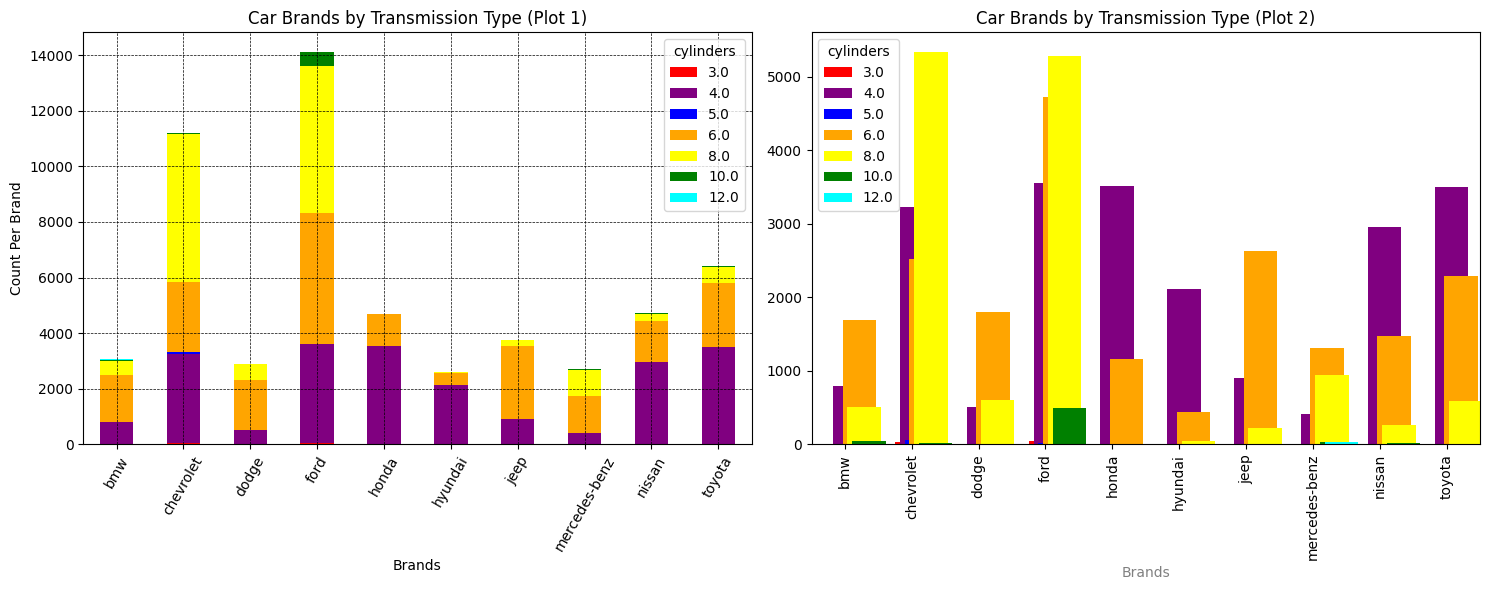

In [4]:

# Create subplots (2 columns, 1 row)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first chart (Plot a - stacked bars)
dfp.plot(kind="bar", color=colors, stacked=True, ax=ax1)
ax1.set_xlabel("Brands", color='black')
ax1.set_ylabel("Count Per Brand", color='black')
ax1.set_title('Car Brands by Transmission Type (Plot 1)')
ax1.set_xticklabels(dfp.index, rotation=60, color='black')
ax1.set_yticklabels(ax1.get_yticklabels(), color='black')
ax1.grid(color='black', linestyle='--', linewidth=0.5)

# Plot the second chart (Plot b - grouped bars with violations)
dfp.plot(kind="bar", color=colors, stacked=False, ax=ax2)  # Grouped bars

# ax2.grid(color='black', linestyle=':', linewidth=2, alpha=0.7)  # More visible and excessive gridlines

for rect in ax2.patches:
    rect.set_width(0.5)  # Make the bars thinner

# Adding unnecessary visual clutter:
ax2.set_xlabel("Brands", color='gray')  # Hard-to-read axis label color
ax2.set_title('Car Brands by Transmission Type (Plot 2)', fontsize=12, color='black')  # Unclear title color

ax2.set_xticklabels(dfp.index, rotation=90, color='black')  # Over-rotated x-tick labels
ax2.set_yticklabels(ax2.get_yticklabels(), color='black')  # Unnecessary color change for y-tick labels

# Remove the y-axis label on the second plot (Plot b)
ax2.set_ylabel('')

# Adjust the y-axis limits to remove excess space at the top
ax2.set_ylim(bottom=0)  # Set the bottom of the y-axis to 0
# ax2.set_ylim(top=ax2.get_ylim()[1] * 1.1)  # Increase the top limit slightly to ensure the bars fit nicely
# ax2.grid(color='black', linestyle='--', linewidth=0.5)


# Adjust layout to make sure the plots don't overlap
plt.tight_layout()

# Show the plots
plt.show()


In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'posting_date'],
      dtype='object')

C:\Users\Vram\AppData\Local\Temp\ipykernel_20356\1203818192.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Vram\AppData\Local\Temp\ipykernel_20356\1203818192.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Vram\AppData\Local\Temp\ipykernel_20356\1203818192.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Vram\AppData\Local\Temp\ipykernel_20356\1203818192.py:32: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Vram\AppData\Local\Temp\ipykernel_20356\1203

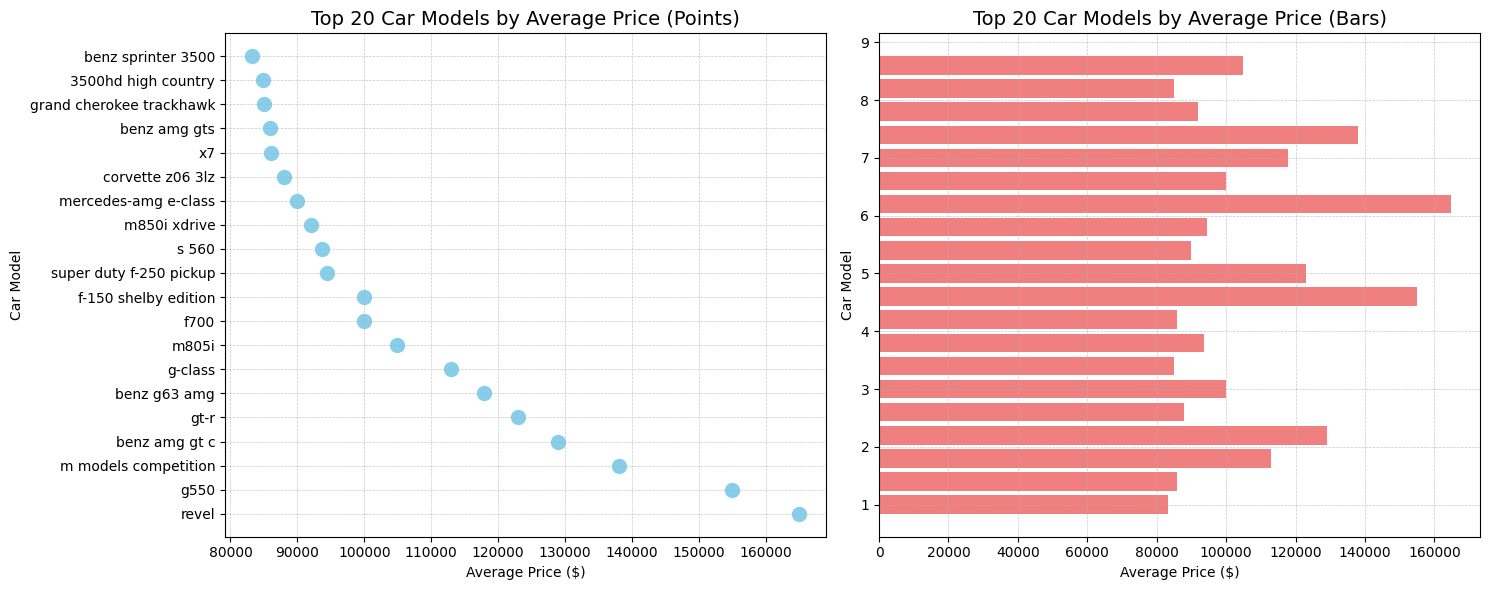

In [31]:
# Step 1: Drop rows where 'model' or 'price' are missing
df_cleaned = df.dropna(subset=['model', 'price'])

# Step 2: Convert 'price' to numeric if it's not already (handles potential errors)
df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')

# Group by 'model' and calculate the average price per model
avg_price_per_model = df_cleaned.groupby('model')['price'].mean().sort_values(ascending=False).head(20)

# avg_price_per_model2 = df_cleaned.groupby('model')['price'].mean().sort_values(ascending=False).head(20)
avg_price_per_model2 = avg_price_per_model.sample(frac=1).reset_index(drop=True)



# Create subplots (2 columns, 1 row)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left Plot (Scatter Plot with Points)
ax1.scatter(avg_price_per_model.values, avg_price_per_model.index, color='skyblue', s=100)  # s=100 for point size
ax1.set_xlabel('Average Price ($)', color='black')
ax1.set_ylabel('Car Model', color='black')
ax1.set_title('Top 20 Car Models by Average Price (Points)', fontsize=14, color='black')
ax1.set_xticklabels(ax1.get_xticklabels(), color='black')
ax1.set_yticklabels(avg_price_per_model.index, color='black')
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Right Plot (Bar Plot)
ax2.barh(avg_price_per_model2.index, avg_price_per_model2.values, color='lightcoral')
ax2.set_xlabel('Average Price ($)', color='black')
ax2.set_ylabel('Car Model', color='black')
ax2.set_title('Top 20 Car Models by Average Price (Bars)', fontsize=14, color='black')
ax2.set_xticklabels(ax2.get_xticklabels(), color='black')
ax2.set_yticklabels(avg_price_per_model2.index, color='black')
ax2.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout to make sure the plots don't overlap
plt.tight_layout()

# Show the plots
plt.show()

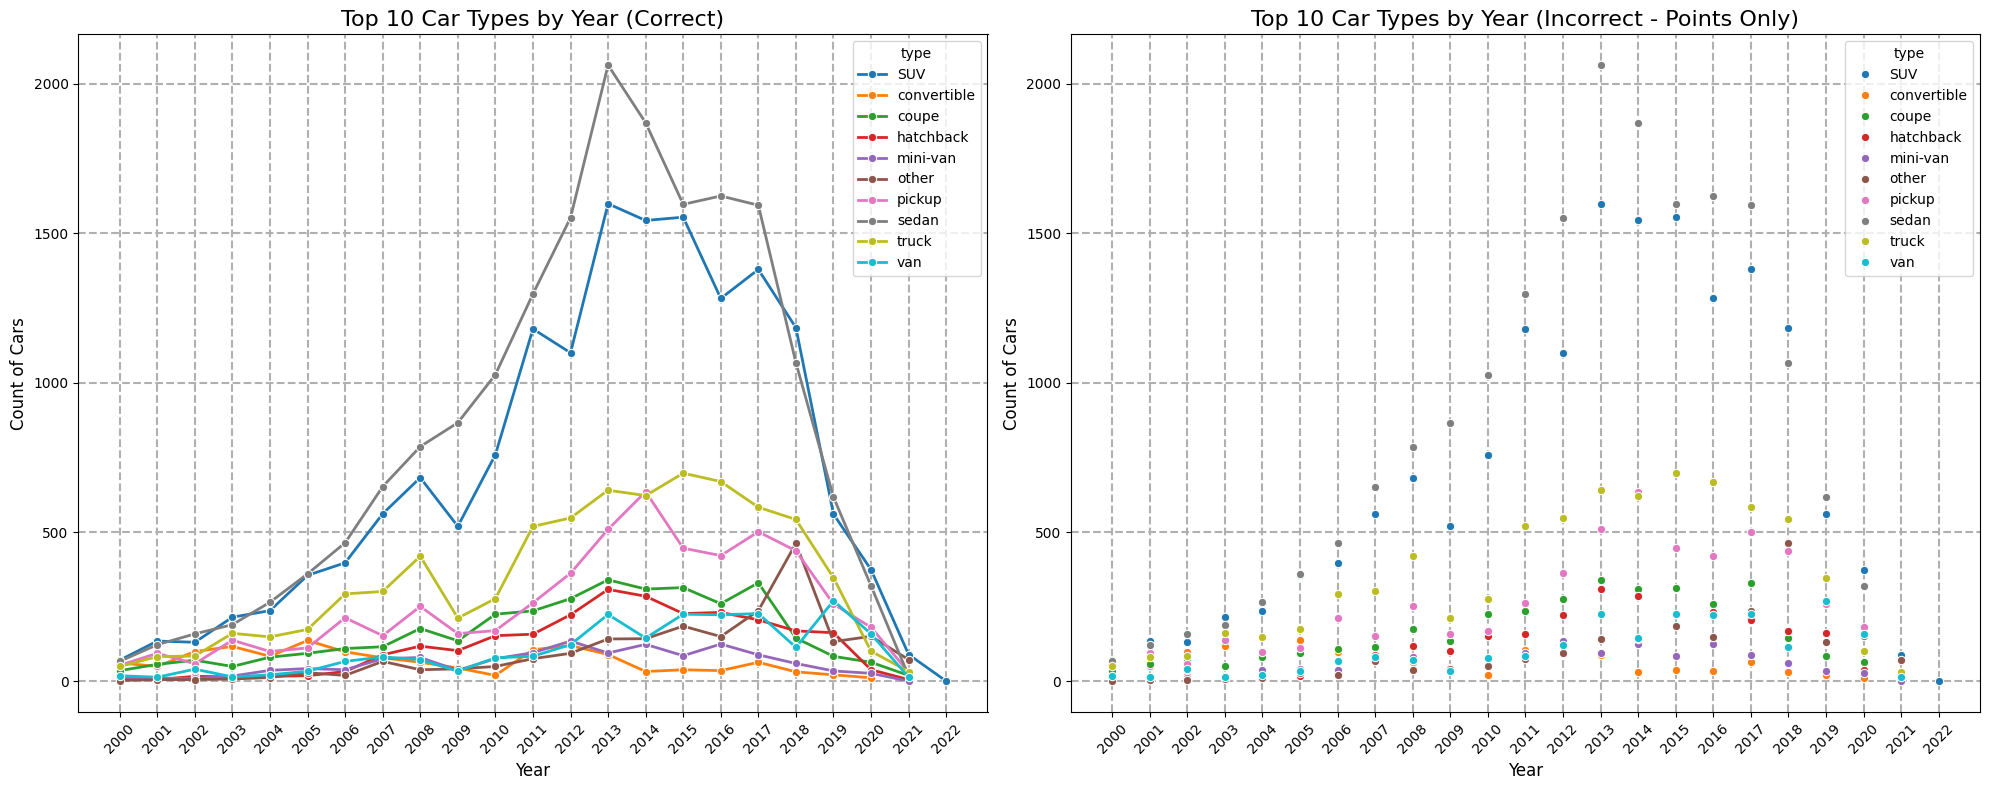

In [51]:
# Count the frequency of each car type to get the top 10 most frequent car types
top_types = df['type'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 car types
df_top_types = df[df['type'].isin(top_types)]

# Group by car type and year to get the count of cars per type per year
type_year_counts = df_top_types.groupby(['type', 'year']).size().reset_index(name='count')

# Create subplots (2 columns, 1 row)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Left Plot (Correct Line Plot)
sns.lineplot(x='year', y='count', hue='type', data=type_year_counts, marker='o', lw=2, ax=ax1)
ax1.set_title('Top 10 Car Types by Year (Correct)', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Count of Cars', fontsize=12)
ax1.set_xticks(type_year_counts['year'].unique())
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, linestyle='--', linewidth=1.5)

# Right Plot (Incorrect - Points Only, No Lines)
sns.lineplot(x='year', y='count', hue='type', data=type_year_counts, marker='o', lw=0, ax=ax2)
ax2.set_title('Top 10 Car Types by Year (Incorrect - Points Only)', fontsize=16)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Count of Cars', fontsize=12)
ax2.set_xticks(type_year_counts['year'].unique())
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, linestyle='--', linewidth=1.5)

# Adjust layout to make sure the plots don't overlap
plt.tight_layout()

# Show the plots
plt.show()
